<div style='display: flex; flex-direction: row; align-items: center; justify-content: space-between; color: black;  background: #fbe216; margin-right: 50px; height: 100px;'>
<h1 style="width: 90%; text-align: center; padding-top: 20px; font-weight:bold;">Projet Algorithmique Avancée</h1>
<img src="https://www.cesi.fr/wp-content/uploads/2022/07/lg_cesi.png" style="width: 100px; height: 100px;">
</div>

<h4 style='text-align: left; color: #fbe216; font-weight:bold; padding:10px; margin-right: 50px;'>Prérequis</h4>

Ce document intégre des codes Python. Pour pouvoir les exécuter, les paquets ci-après sont requis. Il suffit simplement de lancer la prochaine cellule pour les installer automatiquement dans l'environnement en cours.

In [2]:
!pip install numpy
!pip install matplotlib
!pip install networkx

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

<p>
    Aujourd'hui, la réduction des émissions de gaz à effet de serre est un enjeu prioritaire pour de nombreux pays. De nombreux accords ont été signés entre les états. Les premiers engagements, sont apparus lors de la signature du protocole de Kyoto en 1997. Les scientifiques jugent aujourd'hui insufisant l'entrée en vigueur de ce protocole face à l'avancement du réchauffement climatique.<br/>
    L'action est donc portée sur un changement des comportements au sein de notre société pour essayer de diminuer notre impact environnemental. Ceci commence notamment avec une adaptation de l'usage des transports.
</p>

<h4 style='text-align: left; color: #fbe216; font-weight:bold; padding:10px; margin-right: 50px;'>Présentation de l'équipe en charge du projet</h4>

<table style="border: none;">
    <tbody style="border: none;">
        <tr style="border: none;">
            <td style="border: none;">
                <img src="https://dsm04pap003files.storage.live.com/y4mrPh_yseUFfOwtw3T7wvGeQdKdXiR8yh_3CjvI4iWvuvra7VV8dRTKsZiE8hJ3bolrevZjC4hL0yRh8Edzq-e4zxUuJYBrx8DIjYvzTb5UAf64CuMMSt1zzjMv4d5rmrqqCsrEo2S3wWh9E2eHvMYpyy9XcvZo7fkQf1O2inCrm7TLMXn8L3dUK7HSEvVABnb?width=800&height=800&cropmode=center" />
            </td>
            <td style="border: none;">
                <img src="https://dsm04pap003files.storage.live.com/y4mdrJBIrMjk5K4hzU8-NjQcWUPl16XfAnWJ3A8cQO9quUGBzFtPOWRlPFmVbyz65M2lWD-zj44bSaP7I4jEHGwNh71ojMqM0wlAX-iRZzav3XJugn5CBOQzmWqGmCvlJtYhk_7WIJYEF7cCXavTmJYvPaOyNrqrK_s2Vq7pGAvvwCw2MhIsyp-E1UMCmL1G6Lu?width=800&height=800&cropmode=none" />
            </td>
            <td style="border: none;">
                <img src="https://dsm04pap003files.storage.live.com/y4moTSNS4nfGmU6y_-tBqjzSg2T1fbVCmQv0BRlF96XsCtOaxYssk6atj-pjWt9igxxffMkB30nwdea-QVGu4KllEAKuJ5zmtOJNEznMIDbg0NebAFskm70eaCtgsaKJ0uNMK4O9EWekPkDejQRAQZP2THzIexzWX124wwKoBW2Y83Ib2Ux7hlUpMf5a2qlkaFy?width=800&height=800&cropmode=center" />
            </td>
            <td style="border: none;">
                <img src="https://media.licdn.com/dms/image/C4E03AQG1N6JHdPo1Tg/profile-displayphoto-shrink_800_800/0/1632410457548?e=1691020800&v=beta&t=m4IyU1snzhLHpoNZJk5ducohQaV4ppT-lrrEFjJfJrI">
            </td>
        </tr>
        <tr style="border: none;">
            <td style="border: none;">
                <p style="text-align: center; font-weight:bold;">Victor BILLAT <br/><br/> <span style="font-weight:normal;">Chef de projet</span></p>
            </td>
            <td style="border: none;">
                <p style="text-align: center; font-weight:bold;">Vincent VERLAAN</p>
            </td>
            <td style="border: none;">
                <p style="text-align: center; font-weight:bold;">Valentin GIRAUDEAU</p>
            </td>
            <td style="border: none;">
                <p style="text-align: center; font-weight:bold;">Maxime DUCASSE</p>
            </td>
        </tr>
    </tbody>
<table>
<h2 style='text-align: left; color: #fbe216; font-weight:bold; padding:10px; margin-right: 50px;'>Identification du problème</h2>
    <p>
        Pour répondre, à l'appel d'offre lancé par l'ADEME (Agence de l'Environnement et de la Maîtrise de l'Energie), notre équipe CesiCDP décide d'orienter son travail sur la gestion de tournées de livraison. Pour cela, nous souhaitons mettre en place une solution algortihmique permettant de minimiser le temps d'une tournée de livraison entre différentes villes au travers d'un réseau routier.
        <br/>
        L'objectif de ce projet consiste en :
    </p>
    <ul>
        <li>La réalisation d'un algorithme capable d'accueillir des entrées de tailles variables.</li>
        <li>Une étude statistique du comportement du dit algorithme.</li>
    </ul>
    <h4 style="color: #fbe216">Contraintes :</h4>
        <p>
            Nous avons fait le choix d'implémenter certaines contraintes à notre projet pour essayer d'obtenir des résultats plus réalistes qui tiennent compte de contraintes techniques du domaine des transport routiers. Parmis une liste de suggestions, nous en avons séléctionné deux pour notre problème :
        </p>
        <ul>
            <li><strong>Traffic :</strong> L'algorithme sera capable de prendre en compte des évolutions du traffic sur les différents axes en fonction des horaires de la journée. Ceci aura un impact sur la vitesse de déplacement de nos camions. Ainsi, le temps du circuit de livraison pourra être impacté.</li>
            <li><strong>Nombre de camions :</strong> L'algorithme devra tenir compte d'un nombre de camions disponibles simultanément pour pouvoir répartir les livraisons. Le calcul de la tournée inclura l’affectation des objets (et donc des points de livraison) aux différents camions disponibles, et minimisera la date de retour du dernier camion au dépôt.
            </li>
        </ul>
    <h4 style="color: #fbe216">Autres problèmes connus :</h4>
        <p>
            Notre problème correspond au <strong>problème de tournées des véhicules (Véhicule Routing Problem, VRP)</strong>. Ce dernier cherche à déterminer les différents trajets empruntés par une flotte de véhicules pour livrer différents clients avant de revenir au dépôt. Le but de ce problème est de minimiser le temps de livraison des différents produits.
        </p>
        <p>
            Le problème VRP est un dérivé de celui du <strong>voyageur du commerce (Travelling Salesman Problem, TSP)</strong>. Ce dernier ne prend en considération qu'un seul véhicule pour effectuer la tournée et ainsi consiste à déterminer, selon un ensemble de villes et les distances les séparant, une tournée la plus courte pour livrer chacune des villes une et une seule fois. Ceci revient à chercher le plus court cycle hamiltonien dans un graphe G.
        </p>


<h2 style='text-align: left; color: #fbe216; font-weight:bold; padding:10px; margin-right: 50px;'>Définition mathématique du problème</h2>
    <h4 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;'>Problème de décision</h4>
    <p>
        Durant notre projet, nous allons chercher à répondre au problème de décision suivant : 
        <em>"Est-il possible de créer des itinéraires pour un ensemble de véhicules, partant tous d'un même dépôt, afin de livrer des marchandises à un ensemble de clients, en tenant compte des conditions de circulations, de sorte à minimiser le temps total de livraison ?"</em>        
    </p>

En prenant en compte un graphe pondéré $G$ dont les sommets $V_i$ (de l'ensemble des sommets $V$) représentent les villes et dont les arêtes $E_j$ (de l'ensemble des arêtes $E$) représentent les routes entre chacunes de ces villes, le problème de décision précédent devient : <em>"Est-il possible de trouver dans $G$, $n$ cycles où chaque cycle représente le trajet d'un véhicule partant tous d'un même sommet $V_0$, afin que chaque sommet soit dans un cycle et de sorte à minimiser le temps de livraison $t$ ?"</em>


<h4 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;'>Problème d'optimisation</h4>

De ce problème de décision, nous allons chercher à optimiser le temps de livraison. Pour cela, on formule le problème d'optimisation suivant : "Quelle est la plus petite valeur de $t$ pour laquelle la réponse au problème de décision est 'oui'" ?

<h2 style='text-align: left; color: #fbe216; font-weight:bold; padding:10px; margin-right: 50px;'>Complexité</h2>

Pour savoir dans quelle classe de complexité se situe notre problème, on va chercher à déterminer si :
- Il peut être résolu en temps polynomial, il sera polynomial, alors il appartiendra à la classe $\text{P}$,
- Il peut être vérifiable mais non résolvable en temps polynomial, alors il appartiendra à la classe $\text{NP}$,
- Il est possible de réduire tout problème à ce problème, alors il appartiendra à la classe $\text{NP-Difficile}$,
- Il appartient à la fois à la classe $\text{NP}$ et à la classe $\text{NP-Difficile}$, alors il appartient aussi à la classe $\text{NP-Complet}$

Commençons par voir s'il est possible de vérifier qu'une proposition est bien solution de notre problème en trouvant un algorithme capable de faire cette validation en temps polynomial. Un algorithme dans ce cas pourrait être le suivant :

<div>
    <p> Soit une liste <strong>L</strong> de <strong>n</strong> cycles notés (<strong>C<sub>i</sub></strong> pour <strong>i</strong> allant de <strong>1</strong> à <strong>n</strong>). On crée un dictionnaire <strong>D</strong> ayant pour paire clé/valeur un sommet et un booléen.<br/>
    Exemple : <code>D={S<sub>1</sub>: True, ... S<sub>n</sub>: False}</code>
    </p>
    <blockquote>
    <p>
        Pour chaque cycle <strong>C<sub>i</sub><br/></strong>
        <span style="padding-left: 30px;">
        Si le point de départ n'est pas le même qu'à l'arrivée et qu'il ne correpond pas au dépôt
        </span><br/>
        <span style="padding-left: 60px;">
            La solution n'est pas valide
        </span><br/>
        <span style="padding-left: 60px;">
            On arrête le programme
        </span><br/>
        <span style="padding-left: 30px;">
            Pour chaque sommet <strong>S</strong> du cycle <strong>C<sub>i</sub></strong>
        </span><br/>
        <span style="padding-left: 60px;">
            Si la valeur du dictionnaire pour le sommet <strong>S</strong> est <strong>Vrai</strong>
        </span><br/>
        <span style="padding-left: 90px;">
            Le sommet a déjà été visité donc la solution n'est pas valide
        </span><br/>
        <span style="padding-left: 90px;">
            On arrête le programme
        </span><br/>
        <span style="padding-left: 60px;">
            Sinon
        </span><br/>
        <span style="padding-left: 90px;">
            On met la valeur du dictionnaire pour le sommet <strong>S</strong> à <strong>1</strong>
        </span><br/>
        Pour chaque sommet <strong>S<sub>i</sub></strong> du dictionnaire<br/>
        <span style="padding-left: 30px;">
        Si le sommet n'a pas été visité
        </span><br/>
        <span style="padding-left: 60px;">
            La solution n'est pas valide
        </span><br/>
        <span style="padding-left: 60px;">
            On arrête le programme
        </span><br/>
    </p>
    </blockquote>
<div>

<p>
On peut appliquer cet algortihme à un exemple pour vérifier sa fonctionnalité :
</p>

<div style="display:flex; flex-direction:row; justify-content: space-between;">
    <img style="width: 500px;" src="https://i.imgur.com/u5V0Bhv.png">
    <img style="width: 500px;" src="https://i.imgur.com/mi2oN6d.png">
</div>

In [4]:
# Dictionnaire permettant de totaliser le nombre de fois qu'un des 16 sommets est visité
dico_verification = {
    1: 0, 
    2: 0, 
    3: 0, 
    4: 0, 
    5: 0
}

# Liste de cycles proposés en solution
cycles = [
    [2, 1, 3, 2],
    [2, 5, 4, 2]
]

depot = 2 # Sommet de départ et d'arrivée (dépôt)
is_valid = True # La solution est-elle valide ou non

for cycle in cycles:
    # On vérifie que le cycle commence et se termine bien au dépôt
    if cycle[0] != depot or cycle[-1] != depot:
        is_valid = False
        break

    cycle.pop(0) # On retire le premier élément du cycle (qui est le dépôt)
    cycle.pop(-1) # On retire le dernier élément du cycle (qui est le dépôt)

    # On vérifie que le cycle ne contient pas de doublons
    for sommet in cycle:
        if dico_verification[sommet] == 1:
            is_valid= False
            break
        else:
            dico_verification[sommet] = 1

if is_valid:
    for sommet in dico_verification:
        if sommet == depot:
            continue

        # On vérifie que chaque sommet est visité une et une seule fois
        if dico_verification[sommet] == 0:
            is_valid = False
            break

if(is_valid):
    print("La solution proposée est valide")
else:
    print("La solution proposée n'est pas valide")

La solution proposée est valide


Comme on peut le voir, notre algorithme de vérification va contrôler les $n$ sommets de notre graphe afin de s'assurer qu'ils sont tous visités une et une seule fois par un camion lors de sa tournée de livraison. Ce programme à donc une complexité qui est polynomial valant : $O(N)$.
Ainsi, le problème étant vérifiable de façon polynomial, nous pouvons attribuer ce dernier à la classe $NP$.

De plus, notre problème s'apparente à celui du voyageur du commerce qui est $\text{NP-Complet}$ c'est-à-dire qu'il appartient aussi bien à la classe $NP$ qu'à la classe $\text{NP-Difficile}$. Pour rappel, le voyageur du commerce est un problème qui consiste à déterminer s'il existe un cycle qui parcourt tous les sommets d'un graphe une et une seule fois.
<br/><br/>
Dans notre cas, notre programme est capable de résoudre un problème similaire en ayant $k$ véhicules qui livrent. Ainsi, une instance $I$ du voyageur du commerce, peut être réduite à une instance $I_2$ de notre problème en prenant $k=1$. Cette réduction, nous permet d'associer un problème $\text{NP-Difficile}$ à notre problème $NP$. Ceci rend notre problème au moins aussi difficile qu'un problème de la classe $\text{NP-Difficile}$. On peut ainsi dire que le problème de tournées de véhicules auquel nous essayons de répondre, appartient à la classe $NP$ et $\text{NP-Difficile}$ ce qui le rend $\text{NP-Complet}$.

<h2 style='text-align: left; color: #fbe216; font-weight:bold; padding:10px; margin-right: 50px;'>Modélisation mathématique du problème</h2>

<h4 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;'>Variables</h4>

$G$ : Un graphe complet pondéré <br/>
$K$ : l'ensemble de tous les camions participant à la tournée <br/>
$N$ : l'ensemble des nombres entiers positifs <br/>
$V$ : l'ensemble des sommets du graphe $G$ <br/>
$E$ : l'ensemble des arêtes du graphe $G$ <br/>
$k$ : un camion donné de l'ensemble $K$ <br/>
$x_{ij}$ : une variable booléene vérifiant : "L'arête entre le sommet $i$ et le sommet $j$ est empruntée", d'où $x_{ijk}$ une variable booléene vérifiant "L'arête entre le sommet $i$ et le sommet $j$ est empruntée par le camion $k$" <br/>
$y_{i}$ : une variable booléene vérifiant : "Le sommet $i$ est visité", d'où $y_{ik}$ une variable booléen vérifiant "Le sommet $i$ est visité par le camion $k$ <br/>
$c_{ij}(h)$ : le poids de l'arête entre le sommet $i$ et le sommet $j$ à l'heure $h$

<h4 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;'>Fonction Economique</h4>

$$\text{Minimiser} \qquad t = \sum_{k \in K}\sum_{i \in V}\sum_{j \in V}{x_{ijk} c_{ij}(h)}$$

<h4 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;'>Contraintes</h4>

L'une des premières contraintes de notre projet consiste à s'assurer que chaque sommet est visité une seule fois. Dans notre cas, cette contrainte revient à empécher plusieurs camions de visiter un sommet et à s'assurer que le sommet possède un seul chemin d'arriver et un seul chemin de départ pour quitter le sommet en question. Cette contrainte s'applique à l'ensemble des sommets sauf pour le dépôt qui lui est visité par plusieurs camions. On peut exprimer ça comme ceci :

- Chaque sommet est visité par un seul camion :

$$\sum_{k \in K}^{i > 0}y_{ik} = 1\qquad \forall i \ne 0 \in V$$

- Chaque sommet à une seule arrivée

$$\sum_{i \in V} x_{ijk} = y_{jk}\qquad \forall j \in N, \forall k \in K$$

- Chaque sommet à un seul départ

$$\sum_{i \in V} x_{ijk} = y_{ik}\qquad \forall j \in N, \forall k \in K$$

Par ailleurs c'est deux contraintes ci-dessus permettent d'empécher notre camion de faire demi-tour. Si le sommet ne possède qu'une seule arrivée et qu'un seul départ, on est assuré que notre camion ne repasse pas par notre sommet.

/!\ Stop Ici /!\


- Chaque camion quitte et revient au dépôt

$$\sum_{i \in V}^{i>0} x_{0ik} = 2$$

<h2 style='text-align: left; color: #fbe216; font-weight:bold; padding:10px; margin-right: 50px;'>Méthode de résolution</h2>

<h4 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;'>Structure de données envisagée</h4>
        
On compte générer notre graphe à l'aide d'une matrice d'adjacence de taille $n$ correspondant au nombre de sommet du graphe.

$$M_{i, j} = \begin{pmatrix} S_{1,1} & S_{1,2} & \cdots & S_{1,j} \\ S_{2,1} & S_{2,2} & \cdots & S_{2,j} \\ \vdots  & \vdots  & \ddots & \vdots  \\ S_{i,1} & S_{i,2} & \cdots & S_{i,j} \end{pmatrix}$$

$$\forall i \in [0,n] ; \text{et} ; \forall j \in [0,n]$$

<h4 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;'>Type de graphe à tester</h4>
    Nous allons réaliser le projet sur des graphes connexes. 
    Nous allons générer un graphe complet pour s'assurer que chacune de nos villes soit atteignable.
    Pour la taille des graphes, nous allons générer trois instances. Un graphe à 100 sommets, un deuxième à 1000 sommets et un dernier à 10000 sommets.
    Les graphes seront pondérés en fonction du temps de parcours.
<h4 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;'>Méthode de génération des graphes</h4>

Pour générer les graphes, nous allons génerer leur matrice d'adjacence. Pour cela, étant donné que nos graphes ne sont pas orientés, nous allons générer une moitié de la matrice et par symétrie remplir la seconde moitié. Le code ci-dessous reprend ce procédé :

[[0. 8. 3. 4. 6.]
 [8. 0. 1. 5. 1.]
 [3. 1. 0. 2. 9.]
 [4. 5. 2. 0. 2.]
 [6. 1. 9. 2. 0.]]


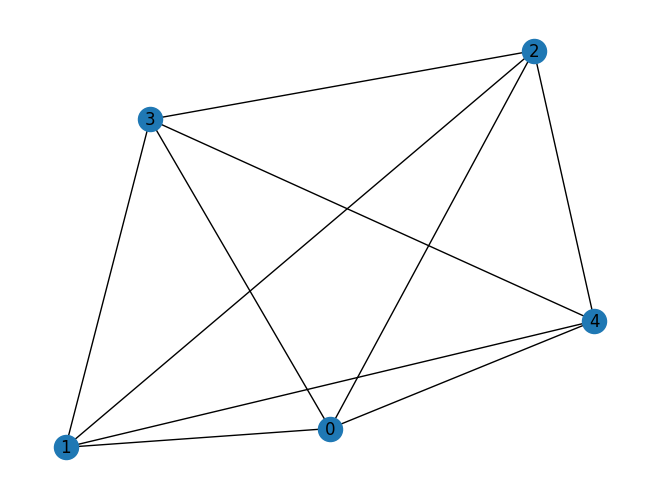

In [9]:
def gen_random_graph(n, weight_range=(1, 10)):
    """
    Génère un graphe aléatoire complet pondéré à n sommets
    """
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            weight = random.randint(*weight_range)
            matrix[i][j] = weight
            matrix[j][i] = weight

    return matrix

n = 5 # Nombre de sommets
matrix = gen_random_graph(n)

print(matrix)
graphe = nx.from_numpy_array(matrix)

nx.draw(graphe, with_labels=True)
plt.show()

<h2 style='text-align: left; color: #fbe216; font-weight:bold; padding:10px; margin-right: 50px;'>Références</h2>
    <ul>
        <li><a href="https://en.wikipedia.org/wiki/Vehicle_routing_problem">Vehicule Routing Problem</a>, Wikipedia (19 Mai 2023)</li>
        <li><a href="https://en.wikipedia.org/wiki/Travelling_salesman_problem">Travelling Salesman Problem</a>, Wikipedia (21 Mai 2023) </li>
        <li><a href="https://www.i3s.unice.fr/~malapert/publications/malapert-06-FT.pdf">Optimisation de tournées de véhicules pour
l’exploitation de Réseau Telecom</a>, Arnaud Malapert, i3s.unice.fr (6 Septembre 2006) </li>
    <li><a href="https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwj5n5if2K7_AhWzSaQEHQ-XCa8QFnoECAUQAQ&url=https%3A%2F%2Fwww.theses.fr%2F2016ARTO0203.pdf&usg=AOvVaw1ej2dEOSPQURBBChuKX1Nv">Les problèmes de collectes et livraisons avec collaboration et transbordements : modélisations et méthodes approchées</a>, Nicolas Danloup (1 décembre 2016)</li>
    </ul>